# Comparison between classiq and pennylane implementations

Within this notebook, we address the differences between classiq and pennylane implementations. 
Both are common quantum software frameworks:
- classiq: https://docs.classiq.io/latest/classiq_101/
- pennylane: https://docs.pennylane.ai/en/stable/introduction/pennylane.html

Both Classiq and PennyLane enable the construction of quantum circuits using fundamental gates and predefined operations.\
In PennyLane, all qubits are defined at the beginning, and operations are explicitly applied to these qubits within the Python code, resulting in a circuit structure that mirrors the code's layout.\
Conversely, Classiq employs a high-level modeling approach where qubits are allocated dynamically during the synthesis process. This abstraction allows for flexible qubit management and defers the concrete circuit construction to a synthesis step.\
PennyLane is particularly well-suited for simulating quantum circuits, offering features like automatic differentiation that facilitate optimization in quantum machine learning applications.\
Classiq, on the other hand, is designed to generate hardware-aware circuits optimized for execution on real quantum devices, considering constraints like qubit connectivity and gate sets during the synthesis process.

TL;DR: Use PennyLane for simulation and quantum machine learning tasks where circuit flexibility and differentiation are essential. Opt for Classiq when targeting deployment on actual quantum hardware, requiring optimized and hardware-constrained circuit synthesis.​

## QSVT as test case

In order to demonstrate the strengths of each framework, we use our QSVT circuit to solve the linear system $A\tilde{T}=B$ of the cooling system problem as a test case, where
$$
A_{ij} =
\left\{
\begin{array}{ll}
\displaystyle \frac{1}{R_\mathrm{env}} + \sum_{(i,j)\in\mathbf{E}} \frac{1}{R_{ij}} & \text{if } i = j \\
\displaystyle -\frac{1}{R_{ij}} & \text{if } i < j \\
\displaystyle -\frac{1}{R_{ji}} & \text{if } i > j
\end{array}
\right.
$$

$$
\tilde{T}_i = T_i - T_\mathrm{env}
$$

$$
B_i = \dot{Q}_i
$$
This includes the block encoding of the matrix representing the system with $m$ connections, the state preparation of the $B$ vector and the QSVT circuit for inverting matrix $A$. Check out the paper for more details. To keep the circuit short, we have chosen a QSVT configuration resulting in a relatively short circuit.

In the following, we will compare three metrics:
1. Number of gates of the transpiled circuit.
2. Time to transpile the circuit.
3. Runtime of the state vector simulation.

Note: We have used classiq 0.75.0 and pennylane 0.41.0

## Import python libraries for plotting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'svg.fonttype': 'none'
          }
plt.rcParams.update(params) 
from matplotlib.lines import Line2D

# 1. Number of gates of the transpiled circuit
We have implemented the QSVT-based linear system solver in classiq (CQ) and pennylane (PL). 
Here, we transpile the circuit to the same gate set containing CNOT, RX, RY, and RZ gates.
This yields quantum circuits for a fair comparison regarding the number of gates.

We get the pennylane data by running:
```
python qsvt_decomposition_pl.py --m 1
python qsvt_decomposition_pl.py --m 2
python qsvt_decomposition_pl.py --m 3
python qsvt_decomposition_pl.py --m 4
python qsvt_decomposition_pl.py --m 5
python qsvt_decomposition_pl.py --m 6
```

We get the classiq data by running:
```
python qsvt_decomposition_classiq.py --m 1 -transpilation_option "decompose"
python qsvt_decomposition_classiq.py --m 2 -transpilation_option "decompose"
python qsvt_decomposition_classiq.py --m 3 -transpilation_option "decompose"
python qsvt_decomposition_classiq.py --m 4 -transpilation_option "decompose"
python qsvt_decomposition_classiq.py --m 5 -transpilation_option "decompose"
python qsvt_decomposition_classiq.py --m 6 -transpilation_option "decompose"

python qsvt_decomposition_classiq.py --m 1 -transpilation_option "intensive"
python qsvt_decomposition_classiq.py --m 2 -transpilation_option "intensive"
python qsvt_decomposition_classiq.py --m 3 -transpilation_option "intensive"
python qsvt_decomposition_classiq.py --m 4 -transpilation_option "intensive"
python qsvt_decomposition_classiq.py --m 5 -transpilation_option "intensive"
python qsvt_decomposition_classiq.py --m 6 -transpilation_option "intensive"
```

In classiq, we have the option to set the level of optimization in the synthesis step. We include "decompose" and "intensive" corresponding to the naive and most sophisticated levels. Check out the documentation for more details: https://docs.classiq.io/latest/user-guide/synthesis/quantum-program-transpilation/

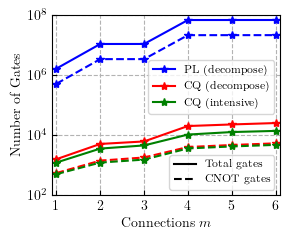

In [2]:
# load data
with open('data/specs_dict_1_pl.pkl', 'rb') as f:
    specs_dict_1_pl = pickle.load(f)
with open('data/specs_dict_2_pl.pkl', 'rb') as f:
    specs_dict_2_pl = pickle.load(f)
with open('data/specs_dict_3_pl.pkl', 'rb') as f:
    specs_dict_3_pl = pickle.load(f)
with open('data/specs_dict_4_pl.pkl', 'rb') as f:
    specs_dict_4_pl = pickle.load(f)
with open('data/specs_dict_5_pl.pkl', 'rb') as f:
    specs_dict_5_pl = pickle.load(f)
with open('data/specs_dict_6_pl.pkl', 'rb') as f:
    specs_dict_6_pl = pickle.load(f)

m = [1, 2, 3, 4, 5, 6]
num_gates_pl = [
    specs_dict_1_pl['resources'].num_gates,
    specs_dict_2_pl['resources'].num_gates,
    specs_dict_3_pl['resources'].num_gates,
    specs_dict_4_pl['resources'].num_gates,
    specs_dict_5_pl['resources'].num_gates,
    specs_dict_6_pl['resources'].num_gates
]
num_cnots_pl = [
    specs_dict_1_pl['resources'].gate_types['CNOT'],
    specs_dict_2_pl['resources'].gate_types['CNOT'],
    specs_dict_3_pl['resources'].gate_types['CNOT'],
    specs_dict_4_pl['resources'].gate_types['CNOT'],
    specs_dict_5_pl['resources'].gate_types['CNOT'],
    specs_dict_6_pl['resources'].gate_types['CNOT']
]
execution_time_pl = [
    specs_dict_1_pl['execution_time'],
    specs_dict_2_pl['execution_time'],
    specs_dict_3_pl['execution_time'],
    specs_dict_4_pl['execution_time'],
    specs_dict_5_pl['execution_time'],
    specs_dict_6_pl['execution_time']
]

with open('data/specs_dict_1_cq_decompose.pkl', 'rb') as f:
    specs_dict_1_cq_decompose = pickle.load(f)
with open('data/specs_dict_2_cq_decompose.pkl', 'rb') as f:
    specs_dict_2_cq_decompose = pickle.load(f)
with open('data/specs_dict_3_cq_decompose.pkl', 'rb') as f:
    specs_dict_3_cq_decompose = pickle.load(f)
with open('data/specs_dict_4_cq_decompose.pkl', 'rb') as f:
    specs_dict_4_cq_decompose = pickle.load(f)
with open('data/specs_dict_5_cq_decompose.pkl', 'rb') as f:
    specs_dict_5_cq_decompose = pickle.load(f)
with open('data/specs_dict_6_cq_decompose.pkl', 'rb') as f:
    specs_dict_6_cq_decompose = pickle.load(f)

with open('data/specs_dict_1_cq_intensive.pkl', 'rb') as f:
    specs_dict_1_cq_intensive = pickle.load(f)
with open('data/specs_dict_2_cq_intensive.pkl', 'rb') as f:
    specs_dict_2_cq_intensive = pickle.load(f)
with open('data/specs_dict_3_cq_intensive.pkl', 'rb') as f:
    specs_dict_3_cq_intensive = pickle.load(f)
with open('data/specs_dict_4_cq_intensive.pkl', 'rb') as f:
    specs_dict_4_cq_intensive = pickle.load(f)
with open('data/specs_dict_5_cq_intensive.pkl', 'rb') as f:
    specs_dict_5_cq_intensive = pickle.load(f)
with open('data/specs_dict_6_cq_intensive.pkl', 'rb') as f:
    specs_dict_6_cq_intensive = pickle.load(f)

# sort data
m = [1, 2, 3, 4, 5, 6]
num_gates_cq_decompose = [
    specs_dict_1_cq_decompose['rx'] + specs_dict_1_cq_decompose['rz'] + specs_dict_1_cq_decompose['cx'],
    specs_dict_2_cq_decompose['rx'] + specs_dict_2_cq_decompose['rz'] + specs_dict_2_cq_decompose['cx'],
    specs_dict_3_cq_decompose['rx'] + specs_dict_3_cq_decompose['rz'] + specs_dict_3_cq_decompose['cx'],
    specs_dict_4_cq_decompose['rx'] + specs_dict_4_cq_decompose['rz'] + specs_dict_4_cq_decompose['cx'],
    specs_dict_5_cq_decompose['rx'] + specs_dict_5_cq_decompose['rz'] + specs_dict_5_cq_decompose['cx'],
    specs_dict_6_cq_decompose['rx'] + specs_dict_6_cq_decompose['rz'] + specs_dict_6_cq_decompose['cx']
]
num_cnots_cq_decompose = [
    specs_dict_1_cq_decompose['cx'],
    specs_dict_2_cq_decompose['cx'],
    specs_dict_3_cq_decompose['cx'],
    specs_dict_4_cq_decompose['cx'],
    specs_dict_5_cq_decompose['cx'],
    specs_dict_6_cq_decompose['cx']
]
depth_cq_decompose = [
    specs_dict_1_cq_decompose['depth'],
    specs_dict_2_cq_decompose['depth'],
    specs_dict_3_cq_decompose['depth'],
    specs_dict_4_cq_decompose['depth'],
    specs_dict_5_cq_decompose['depth'],
    specs_dict_6_cq_decompose['depth']
]
execution_time_cq_decompose = [
    specs_dict_1_cq_decompose['execution_time'],
    specs_dict_2_cq_decompose['execution_time'],
    specs_dict_3_cq_decompose['execution_time'],
    specs_dict_4_cq_decompose['execution_time'],
    specs_dict_5_cq_decompose['execution_time'],
    specs_dict_6_cq_decompose['execution_time']
]

num_gates_cq_intensive = [
    specs_dict_1_cq_intensive['rx'] + specs_dict_1_cq_intensive['rz'] + specs_dict_1_cq_intensive['cx'],
    specs_dict_2_cq_intensive['rx'] + specs_dict_2_cq_intensive['rz'] + specs_dict_2_cq_intensive['cx'],
    specs_dict_3_cq_intensive['rx'] + specs_dict_3_cq_intensive['rz'] + specs_dict_3_cq_intensive['cx'],
    specs_dict_4_cq_intensive['rx'] + specs_dict_4_cq_intensive['rz'] + specs_dict_4_cq_intensive['cx'],
    specs_dict_5_cq_intensive['rx'] + specs_dict_5_cq_intensive['rz'] + specs_dict_5_cq_intensive['cx'],
    specs_dict_6_cq_intensive['rx'] + specs_dict_6_cq_intensive['rz'] + specs_dict_6_cq_intensive['cx']
]
num_cnots_cq_intensive = [
    specs_dict_1_cq_intensive['cx'],
    specs_dict_2_cq_intensive['cx'],
    specs_dict_3_cq_intensive['cx'],
    specs_dict_4_cq_intensive['cx'],
    specs_dict_5_cq_intensive['cx'],
    specs_dict_6_cq_intensive['cx']
]
depth_cq_intensive = [
    specs_dict_1_cq_intensive['depth'],
    specs_dict_2_cq_intensive['depth'],
    specs_dict_3_cq_intensive['depth'],
    specs_dict_4_cq_intensive['depth'],
    specs_dict_5_cq_intensive['depth'],
    specs_dict_6_cq_intensive['depth']
]
execution_time_cq_intensive = [
    specs_dict_1_cq_intensive['execution_time'],
    specs_dict_2_cq_intensive['execution_time'],
    specs_dict_3_cq_intensive['execution_time'],
    specs_dict_4_cq_intensive['execution_time'],
    specs_dict_5_cq_intensive['execution_time'],
    specs_dict_6_cq_intensive['execution_time']
]

# plot data
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(m, num_gates_pl, c='blue', label="PL (decompose)", marker="*")
ax.plot(m, num_cnots_pl, c='blue', ls='dashed', marker="*")
ax.plot(m, num_gates_cq_decompose, c='red', label="CQ (decompose)", marker="*")
ax.plot(m, num_cnots_cq_decompose, c='red', ls='dashed', marker="*")
ax.plot(m, num_gates_cq_intensive, c='green', label="CQ (intensive)", marker="*")
ax.plot(m, num_cnots_cq_intensive, c='green', ls='dashed', marker="*")
legend1 = ax.legend(loc='center right', prop={'size': 8}, bbox_to_anchor=(1, 0.6))
linestyle_legend = [
    Line2D([0], [0], color='black', linestyle='solid', label='Total gates'),
    Line2D([0], [0], color='black', linestyle='dashed', label='CNOT gates')
]
legend2 = ax.legend(handles=linestyle_legend, loc='lower right', prop={'size': 8}, ncol=1)
ax.add_artist(legend1)
ax.set_xlabel(r"Connections $m$")
ax.set_ylabel(r"Number of Gates")
ax.set_yscale("log")
ax.tick_params(which='both', direction="in")
ax.grid(True, ls="--", c='0.7', which='both')
ax.set_xlim([0.9, 6.1])
ax.set_ylim([1e2, 1e8])
ax.set_xticks([1, 2, 3, 4, 5, 6])
plt.tight_layout()
plt.savefig("num_gates_qsvt.pdf")
plt.show()

As shown in the plot, the number of gates for both PL and CQ circuits exhibits similar scaling behavior with respect to the number of connections $m$. However, the CQ circuits require several orders of magnitude fewer gates compared to PL. Additionally, the `"intensive"` transpilation option leads to even shorter circuits, consistent with its intended purpose.


# 2. Time to transpile the circuit

Next, we evaluate the time required to transpile the circuits. To do this, we reuse the previous code and measure the elapsed time during transpilation. 
It os important to note that this comparison is not entirely fair, as the two implementations run on different hardware. The PennyLane code executes locally on our machine (AMD EPYC 7742, 2TB RAM), whereas the Classiq code submits jobs to a remote backend. 
Nevertheless, the measured times reflect the actual user experience and are therefore still relevant for comparison.

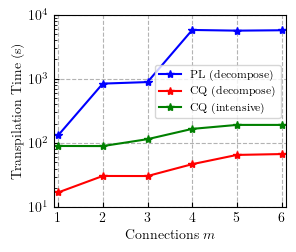

In [3]:
fig, ax = plt.subplots(figsize=(3, 2.5))

ax.plot(m, execution_time_pl, c='blue', marker="*", label="PL (decompose)")
ax.plot(m, execution_time_cq_decompose, c='red', marker="*", label="CQ (decompose)")
ax.plot(m, execution_time_cq_intensive, c='green', marker="*", label="CQ (intensive)")
ax.legend(loc='center right', prop={'size':8}, bbox_to_anchor=(1, 0.6)) # , fancybox=False,  ncol=1, bbox_to_anchor=(1.65, 1))
ax.set_xlabel(r"Connections $m$")
ax.set_ylabel(r"Transpilation Time (s)")
ax.set_yscale("log")
ax.tick_params(which='both', direction="in")
ax.grid(True, ls="--", c='0.7', which='major')
ax.set_xlim([0.9, 6.1])
ax.set_ylim([1e1, 1e4])
ax.set_xticks([1, 2, 3, 4, 5, 6])
plt.savefig("decomposition_time_qsvt.pdf")
plt.show()

As shown in the plot, the transpilation time for PL is significantly longer than for CQ, indicating that PL not only produces longer circuits but also requires more time to transpile them. 

The reason for this is that PL does not primarily focus on efficient circuit decomposition. Instead, its strength lies classical circuit simulation.


# 3. Runtime of the state vector simulation

Finally, we have a look on the runtime for the state vector simulation of the circuit above. Therefore, we neglect the transpilation to the specific gate set and are only interested in the final state vector itself. Again we run the following to gather the runtime data:
```
python qsvt_simulation_pl.py --m 1
python qsvt_simulation_pl.py --m 2
python qsvt_simulation_pl.py --m 3
python qsvt_simulation_pl.py --m 4
python qsvt_simulation_pl.py --m 5
python qsvt_simulation_pl.py --m 6

python qsvt_simulation_cq.py --m 1
python qsvt_simulation_cq.py --m 2
python qsvt_simulation_cq.py --m 3
python qsvt_simulation_cq.py --m 4
python qsvt_simulation_cq.py --m 5
python qsvt_simulation_cq.py --m 6
```

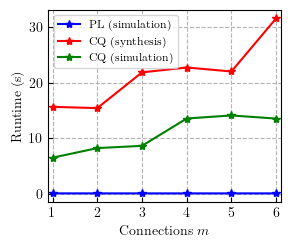

In [4]:
# load data
with open('data/runtime_pl.pkl', 'rb') as f:
    runtime_pl = pickle.load(f)
with open('data/runtime_cq.pkl', 'rb') as f:
    runtime_cq = pickle.load(f)

# plot data
fig, ax = plt.subplots(figsize=(3, 2.5))

ax.plot(runtime_pl.keys(), runtime_pl.values(), c='blue', marker="*", label="PL (simulation)")
ax.plot(runtime_cq.keys(), [val[0] for val in runtime_cq.values()], c='red', marker="*", label="CQ (synthesis)")
ax.plot(runtime_cq.keys(), [val[1] for val in runtime_cq.values()], c='green', marker="*", label="CQ (simulation)")
ax.legend(loc='upper left', prop={'size':8})
ax.set_xlabel(r"Connections $m$")
ax.set_ylabel(r"Runtime (s)")
ax.tick_params(which='both', direction="in")
ax.grid(True, ls="--", c='0.7', which='major')
ax.set_xlim([0.9, 6.1])
ax.set_xticks([1, 2, 3, 4, 5, 6])
plt.savefig("runtime_qsvt.pdf")
plt.show()

The plot above shows the runtime comparison between PL and CQ for executing the circuit. 

Here, the strength of PL becomes evident: it requires less than a second to produce a result. In contrast, the CQ workflow introduces additional overhead, with time split between circuit synthesis (red) and simulation (green), both of which are significantly longer than PL's runtime. Again, this comparison is not entirely fair, as the PL simulation runs locally (M2 Pro,16 GB RAM) and the CQ simulation runs on the classiq backend. But this represents the user experience.
